In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [3]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [7]:
data.columns = ['month', 'value']
data.index = data.month


In [8]:
data.head()

,month,value
month,,
1950-01-01,1950-01-01,-0.060310
1950-02-01,1950-02-01,0.626810
1950-03-01,1950-03-01,-0.008128
1950-04-01,1950-04-01,0.555100
1950-05-01,1950-05-01,0.071577


In [9]:
data = data.drop('month', 1)
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [10]:
data['1950':'1952'] #What do you notice about the range of dates?
#It goes monthly

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [11]:
# What is the empirical range of dates?
data.tail()
#It goes from January 1950 to the most recent month (May 2017 since I am doing this in June)

,value
month,
2017-01-01,0.941970
2017-02-01,0.339860
2017-03-01,1.365400
2017-04-01,-0.088658
2017-05-01,-0.730140


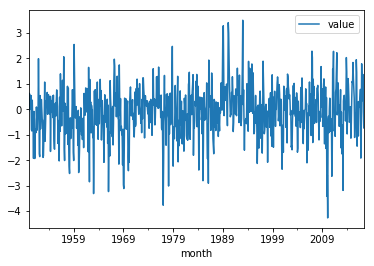

In [14]:
# How to visualize?
import matplotlib.pyplot as plt
%matplotlib inline
data.plot()

In [15]:
# What kind of index do we have?
type(data.index)

pandas.tseries.index.DatetimeIndex

In [16]:
data['1951-11-11':'1951-11-12']

,value
month,


In [17]:
# What if we want a period index?
data_pd = data.to_period()

In [18]:
data_pd['1951-11-11':'1951-11-12'] # this gets one point because period indexes are inclusive (they take overlap)

,value
month,
1951-11,-0.068519


In [19]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [ ]:
# Which is more appropriate for this data?

I think period.

In [20]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
1 loop, best of 3: 546 ms per loop
infer_datetime_format = False, no date parser
1 loop, best of 3: 406 ms per loop
infer_datetime_format = True, date parser provided
1 loop, best of 3: 593 ms per loop
infer_datetime_format = False, date parser provided
1 loop, best of 3: 536 ms per loop


In [21]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [22]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [23]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [27]:
# Does it work with other column names?
pd.to_datetime(df[['month','day','year','hour']]) #other orders, yes, but they still need to match the names 
                                                  #and have to include at least month, day, year

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [36]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html
time_data = pd.read_csv('daily-total-female-births-in-cal.csv',  infer_datetime_format = True)

In [37]:
time_data.head()

,Date,"Daily total female births in California, 1959"
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [42]:
time_data.index = time_data.Date
time_data = time_data.drop('Date',1)
time_data.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [45]:
time_data = time_data.drop('Daily total female births in California', axis = 0)
time_data.tail()

,"Daily total female births in California, 1959"
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


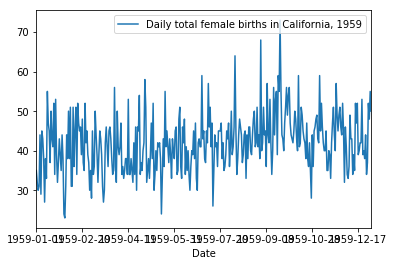

In [46]:
# 1. plot 2. get range of dates 3. convert between time and period index
time_data.plot()

In [55]:
td = time_data.to_period


In [47]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int32

In [48]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [49]:
# It will save you when it can
ts.ix[0:10:2].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')